In [1]:
# general analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

#cleaning data libs
from sklearn import preprocessing

# machine learn libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
# reading the dataset
df1 = pd.read_excel('Data/station.xlsx')
df1

,Código Estação,Nome,Ano,Mês,Dia,Tx,Tn,Amp.,Tmedia,RH,...,Prec,Radiação,Pressão,Pt Orvalho,V. Vento,Dir. Escalar,Raj. (max),Dir Vetorial,Penman_1948,Penman_1956
0,A912,Campo Verde,2007,1,1,27.2,20.8,6.4,23.275000,86.708333,...,0.0,20568.550,928.579167,20.858333,4.191667,323.636560,14.3,311.447211,6.091670,5.897200
1,A912,Campo Verde,2007,1,2,26.6,20.4,6.2,22.437500,87.833333,...,11.2,15707.613,929.812500,20.216667,2.795833,332.575946,10.8,326.954648,4.844056,4.626742
2,A912,Campo Verde,2007,1,3,29.5,20.3,9.2,23.640000,84.120000,...,0.6,23700.930,929.620000,20.588000,3.354167,331.432948,11.8,316.091758,7.264090,6.937731
3,A912,Campo Verde,2007,1,4,28.5,20.3,8.2,23.462500,86.500000,...,0.4,18350.714,928.158333,20.945833,2.654167,327.382952,8.5,324.520498,5.566809,5.322933
4,A912,Campo Verde,2007,1,5,26.0,20.3,5.7,21.616667,94.541667,...,24.4,9963.907,927.295833,20.679167,4.762500,305.196805,12.9,306.914594,3.564105,3.413834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,A912,Campo Verde,2020,12,27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5110,A912,Campo Verde,2020,12,28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5111,A912,Campo Verde,2020,12,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,A912,Campo Verde,2020,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = df1.dropna()
df1

,Código Estação,Nome,Ano,Mês,Dia,Tx,Tn,Amp.,Tmedia,RH,...,Prec,Radiação,Pressão,Pt Orvalho,V. Vento,Dir. Escalar,Raj. (max),Dir Vetorial,Penman_1948,Penman_1956
0,A912,Campo Verde,2007,1,1,27.2,20.8,6.4,23.275000,86.708333,...,0.0,20568.550,928.579167,20.858333,4.191667,323.636560,14.3,311.447211,6.091670,5.897200
1,A912,Campo Verde,2007,1,2,26.6,20.4,6.2,22.437500,87.833333,...,11.2,15707.613,929.812500,20.216667,2.795833,332.575946,10.8,326.954648,4.844056,4.626742
2,A912,Campo Verde,2007,1,3,29.5,20.3,9.2,23.640000,84.120000,...,0.6,23700.930,929.620000,20.588000,3.354167,331.432948,11.8,316.091758,7.264090,6.937731
3,A912,Campo Verde,2007,1,4,28.5,20.3,8.2,23.462500,86.500000,...,0.4,18350.714,928.158333,20.945833,2.654167,327.382952,8.5,324.520498,5.566809,5.322933
4,A912,Campo Verde,2007,1,5,26.0,20.3,5.7,21.616667,94.541667,...,24.4,9963.907,927.295833,20.679167,4.762500,305.196805,12.9,306.914594,3.564105,3.413834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,A912,Campo Verde,2019,12,27,32.5,20.2,12.3,24.887500,70.458333,...,3.8,20976.810,929.220833,18.645833,2.029167,56.756374,11.5,73.032645,6.821978,6.368543
4744,A912,Campo Verde,2019,12,28,29.4,20.1,9.3,24.045833,79.833333,...,0.0,19138.772,929.020833,20.112500,2.225000,349.769700,9.0,347.541332,6.041655,5.684703
4745,A912,Campo Verde,2019,12,29,30.0,20.6,9.4,24.254167,76.416667,...,0.4,18653.352,928.400000,19.512500,2.045833,320.812968,12.7,324.711794,5.864035,5.529622
4746,A912,Campo Verde,2019,12,30,31.2,20.5,10.7,25.329167,70.083333,...,22.8,19380.239,927.087500,19.262500,1.937500,287.558675,11.3,290.791999,6.264768,5.853917


In [4]:
# creating a lsit to delete some columns that are not useful
delete = ['Código Estação', 'Nome', 'Ano', 'Dia', 'Penman_1956', 'Amp.', 'Tmedia', 'RH', 'Prec', 'Dir. Escalar', 'Dir Vetorial']

# creating a list to rename the columns
rename = {'Mês':'Month', 'Tx':'Tmax', 'Tn':'Tmin', 'RHx':'RHmax', 'RHn':'RHmin', 'Radiação':'Radiation', 'Pressão':'Pressure', 'Pt Orvalho':'Tdew', 'V. Vento':'WindS', 'Raj. (max)': 'WindG', 'Penman_1948':'Evaporation'}

In [5]:
df1 = df1.drop(columns = delete, axis = 1)
df1

,Mês,Tx,Tn,RHx,RHn,Radiação,Pressão,Pt Orvalho,V. Vento,Raj. (max),Penman_1948
0,1,27.2,20.8,97.0,70.0,20568.550,928.579167,20.858333,4.191667,14.3,6.091670
1,1,26.6,20.4,98.0,65.0,15707.613,929.812500,20.216667,2.795833,10.8,4.844056
2,1,29.5,20.3,97.0,53.0,23700.930,929.620000,20.588000,3.354167,11.8,7.264090
3,1,28.5,20.3,97.0,64.0,18350.714,928.158333,20.945833,2.654167,8.5,5.566809
4,1,26.0,20.3,99.0,75.0,9963.907,927.295833,20.679167,4.762500,12.9,3.564105
...,...,...,...,...,...,...,...,...,...,...,...
4743,12,32.5,20.2,95.0,42.0,20976.810,929.220833,18.645833,2.029167,11.5,6.821978
4744,12,29.4,20.1,96.0,49.0,19138.772,929.020833,20.112500,2.225000,9.0,6.041655
4745,12,30.0,20.6,96.0,53.0,18653.352,928.400000,19.512500,2.045833,12.7,5.864035
4746,12,31.2,20.5,91.0,47.0,19380.239,927.087500,19.262500,1.937500,11.3,6.264768


In [6]:
df1 = df1.rename(columns = rename)
df1

,Month,Tmax,Tmin,RHmax,RHmin,Radiation,Pressure,Tdew,WindS,WindG,Evaporation
0,1,27.2,20.8,97.0,70.0,20568.550,928.579167,20.858333,4.191667,14.3,6.091670
1,1,26.6,20.4,98.0,65.0,15707.613,929.812500,20.216667,2.795833,10.8,4.844056
2,1,29.5,20.3,97.0,53.0,23700.930,929.620000,20.588000,3.354167,11.8,7.264090
3,1,28.5,20.3,97.0,64.0,18350.714,928.158333,20.945833,2.654167,8.5,5.566809
4,1,26.0,20.3,99.0,75.0,9963.907,927.295833,20.679167,4.762500,12.9,3.564105
...,...,...,...,...,...,...,...,...,...,...,...
4743,12,32.5,20.2,95.0,42.0,20976.810,929.220833,18.645833,2.029167,11.5,6.821978
4744,12,29.4,20.1,96.0,49.0,19138.772,929.020833,20.112500,2.225000,9.0,6.041655
4745,12,30.0,20.6,96.0,53.0,18653.352,928.400000,19.512500,2.045833,12.7,5.864035
4746,12,31.2,20.5,91.0,47.0,19380.239,927.087500,19.262500,1.937500,11.3,6.264768


The data:
 - Tmax: Maximum temperature of the day (°C)
 - Tmin: Minimum temperature of the day (°C)
 - RHmax: Maximum relative air umidity (%)
 - RHmin: Minimum relative air umidity (%)
 - Radiation: Sun radiation measured in mJ/m².day
 - Pressure: Atmospheric pressure
 - Tdew : Temperature of the dew point (°C)
 - Wind Speed: in m/s
 - Wind Gust: in m/s
 - Evaporation: measure in mm³/day

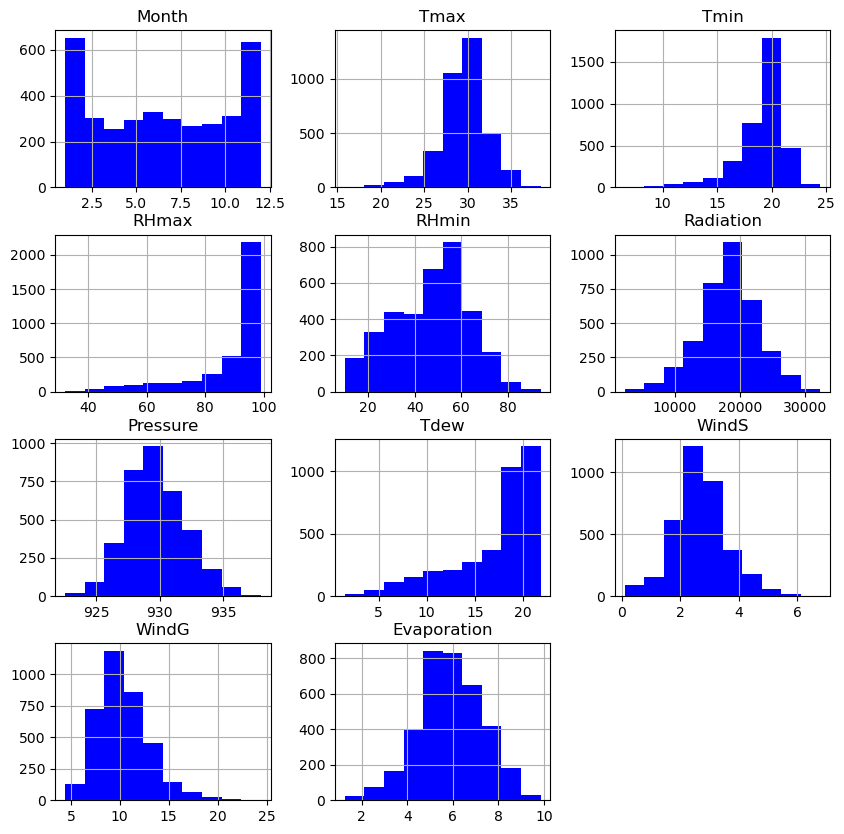

In [72]:
df1.hist(figsize=(10,10), color = 'blue')
plt.savefig('Images/distribution.png')

For the distribution:
 - Windspeed and Windgust have a relatively equal distribution
 - There are more data in January and December
 - Most of the radiation is around 20000 mJ/m.day
 - RH max (maximum relative umidity) have more counts between 80 and 100
 - for the minimum, most of the data is between 40 and 60, with low quantities in the high measures (80+)
 - Maximum temperature stands around the 30°C, while the minimum is around 20°C

In [8]:
g_month = df1.groupby('Month').mean()
g_month

,Tmax,Tmin,RHmax,RHmin,Radiation,Pressure,Tdew,WindS,WindG,Evaporation
Month,,,,,,,,,,
1,28.573214,19.892857,95.916667,59.002976,18886.416021,928.251402,19.986875,2.819709,11.019345,5.827539
2,29.026814,19.995899,96.082019,56.605678,18013.702129,928.555960,19.966471,2.752431,11.066246,5.696913
3,29.433663,20.071947,95.633663,55.752475,17854.322693,928.907838,20.045545,2.413536,10.440924,5.548176
4,28.965370,19.706615,94.638132,56.077821,17379.287058,929.697593,19.560375,2.011970,8.563035,5.121669
5,28.119388,17.806122,90.693878,49.629252,17166.606867,931.237513,16.978825,2.187316,8.102721,4.936643
6,28.277982,17.022324,86.504587,41.770642,16577.495847,932.192391,14.879714,2.514982,8.696636,5.024513
7,29.069799,16.322148,75.271812,30.463087,17707.090040,932.513773,11.092480,2.785076,9.756711,5.768297
8,31.477444,17.689098,66.541353,23.507519,18999.130271,931.425354,9.623837,3.040765,10.683083,6.880779
9,32.477256,19.779783,72.743682,29.032491,18596.495433,930.192381,12.969333,3.179192,11.270036,7.104001


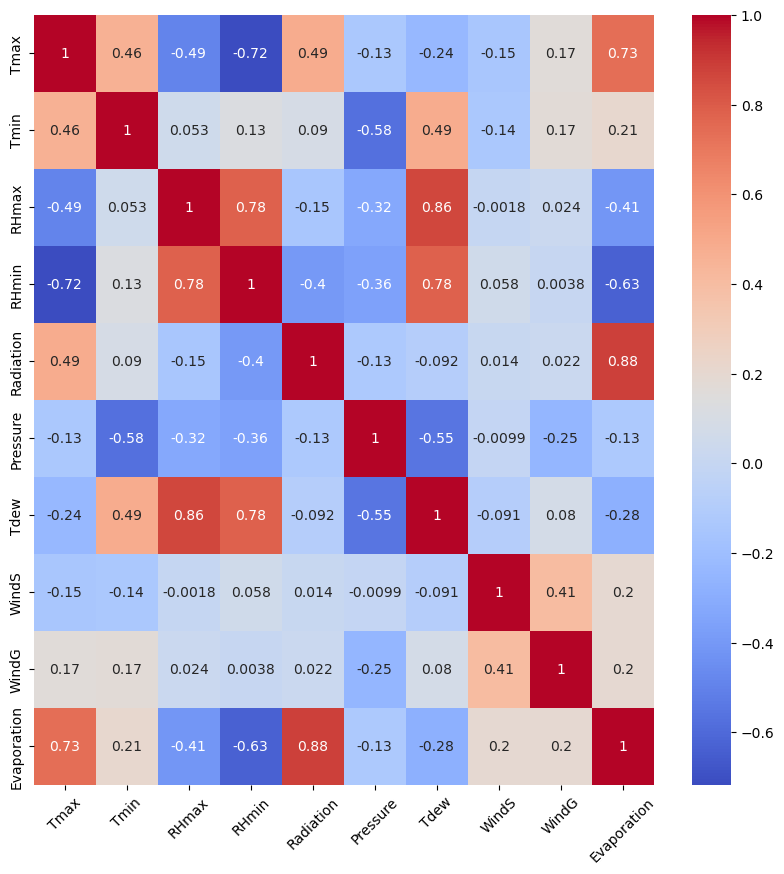

In [75]:
monthless_df1 = df1.drop('Month', axis = 1)

plt.figure(figsize=(10,10))
sns.heatmap(monthless_df1.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.savefig('Images/corr_matrix.png',  bbox_inches='tight')

In [34]:
df_monthless = df1.drop('Month', axis = 1)

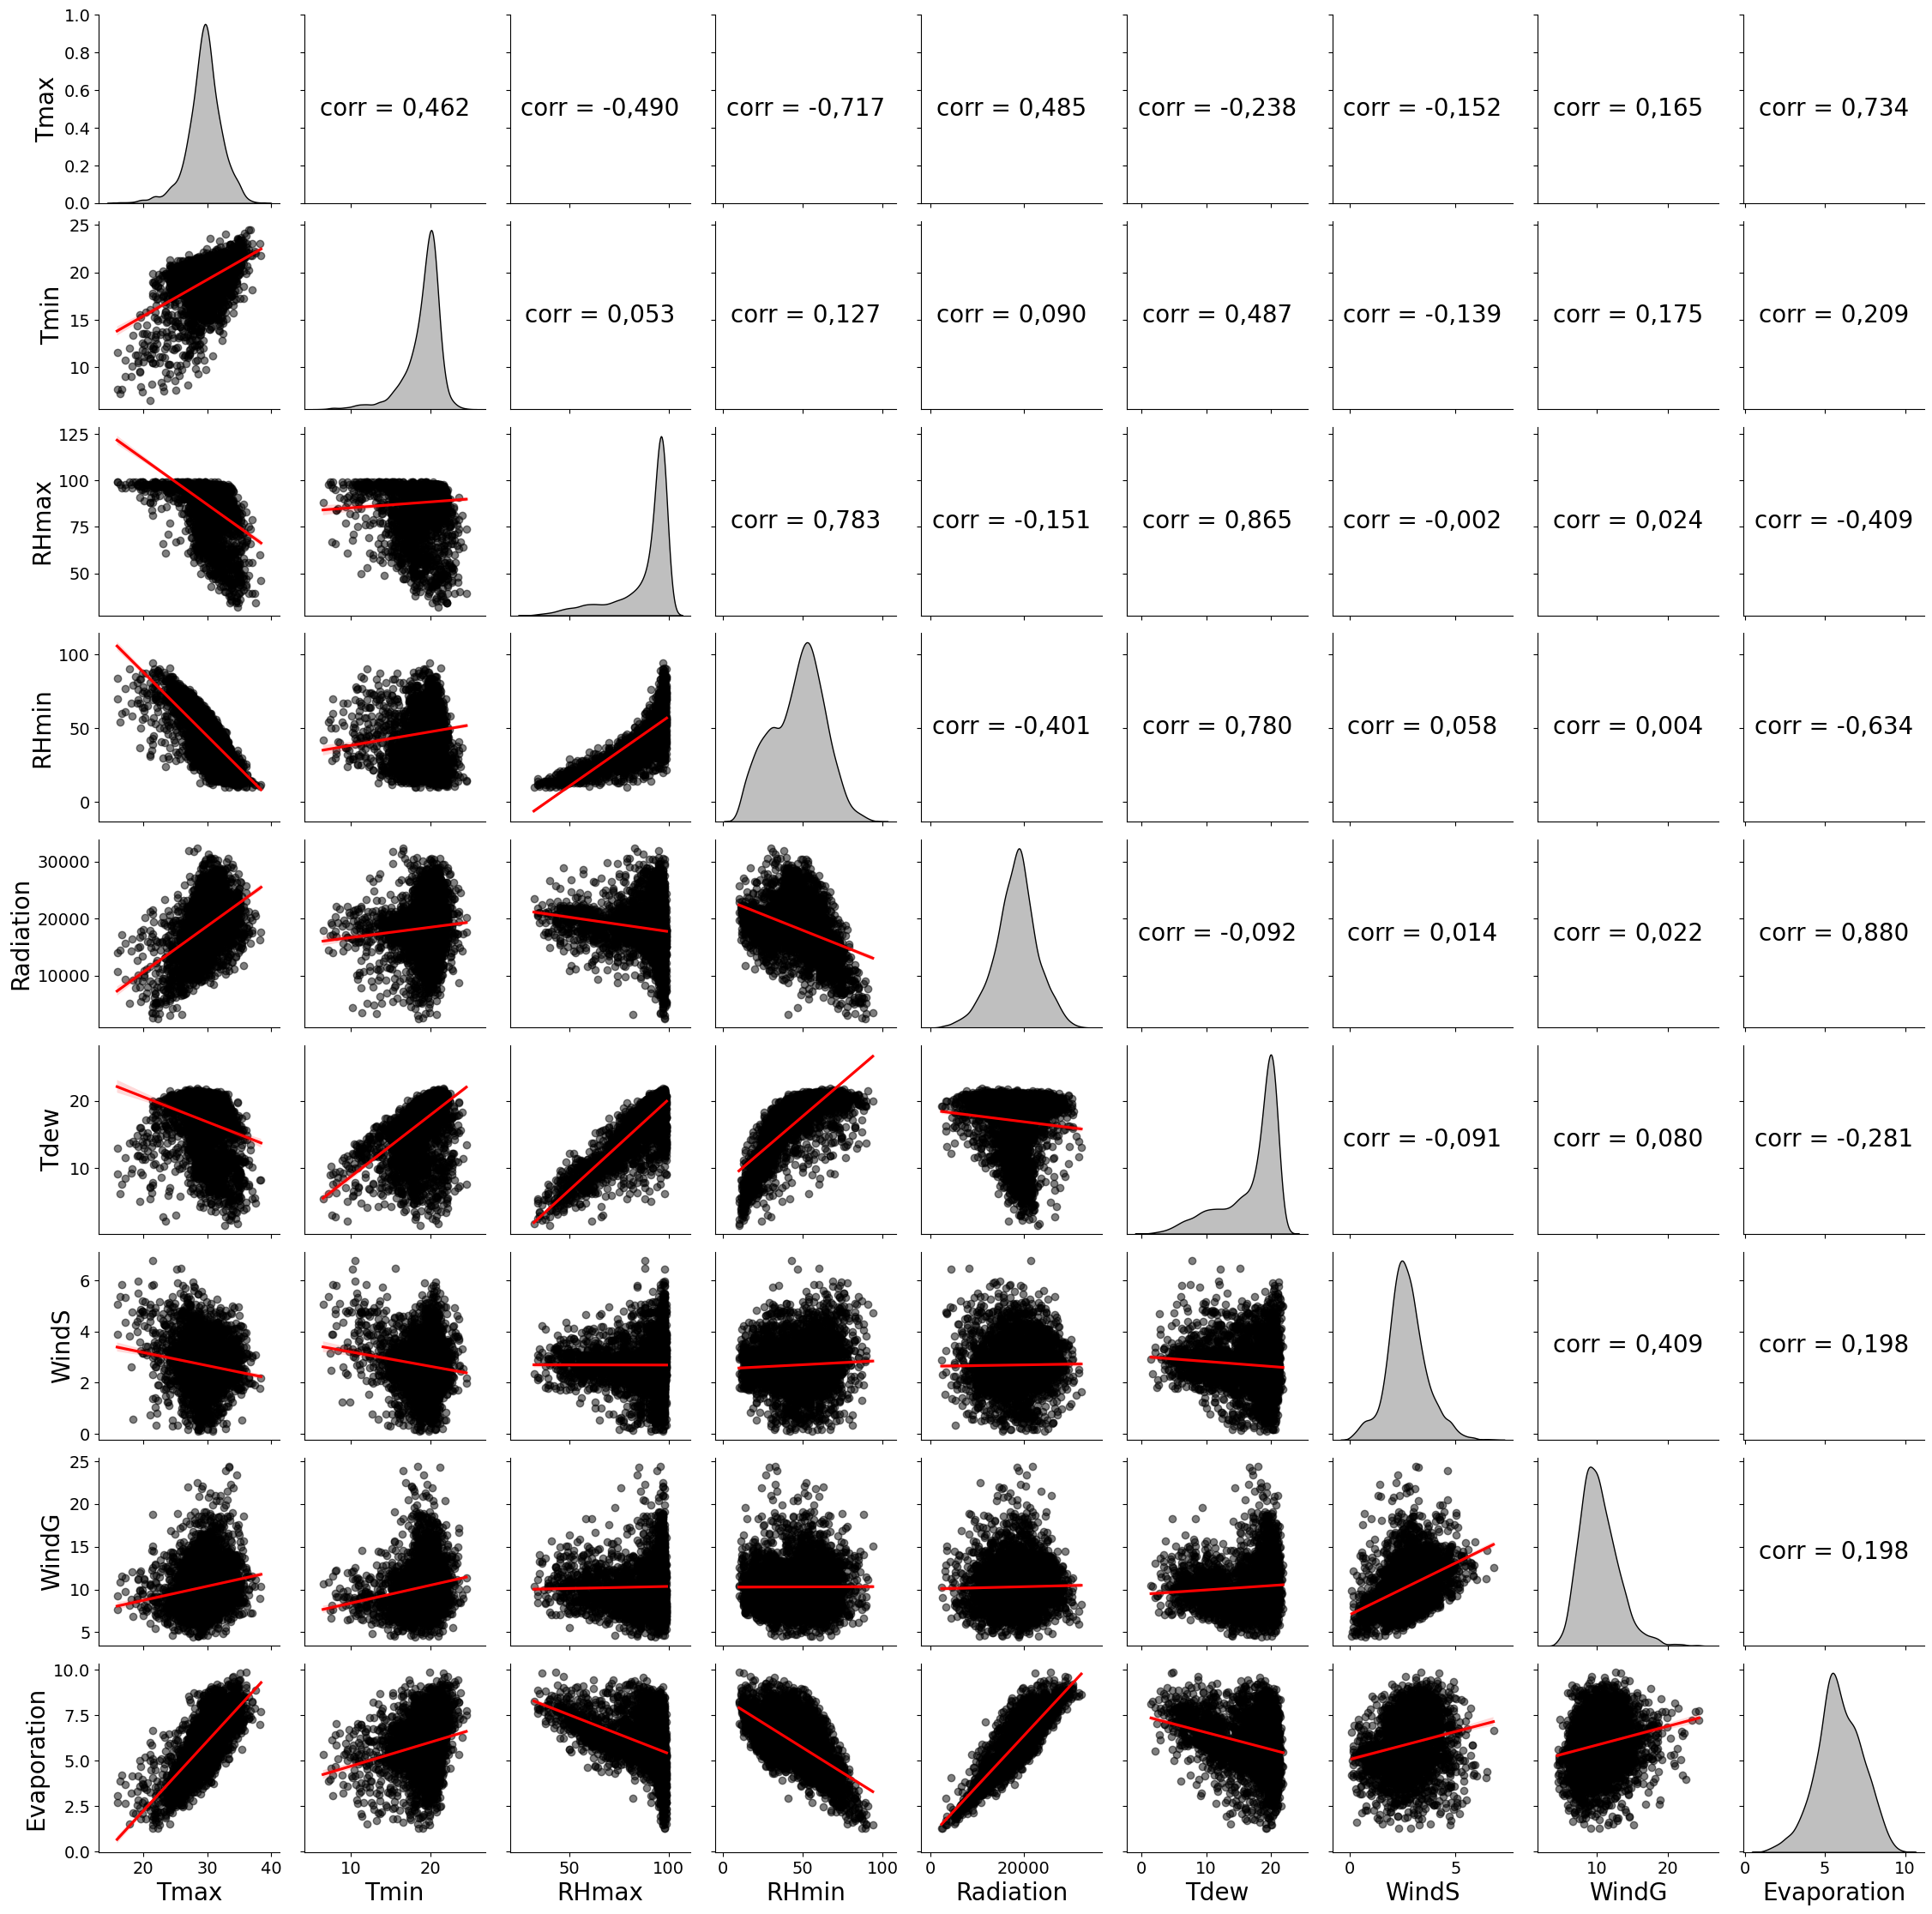

In [36]:
# Define parameter names
parameters = ['Tmax', 'Tmin', 'RHmax', 'RHmin', 'Radiation', 'Tdew', 'WindS', 'WindG', 'Evaporation']

# Remove duplicate columns from the DataFrame
df = pd.DataFrame(df_monthless, columns=parameters)
df = df.loc[:, ~df.columns.duplicated()]

# Set the color palette
colors = ['#000000']  # Set black color for upper triangle
sns.set_palette(sns.color_palette(colors))

# Create a PairGrid
g = sns.PairGrid(df, diag_sharey = False)

# Use a custom function to display centered correlation values in the top right plots
def corrfunc(x, y, **kwargs):
    valid_mask = pd.notnull(x) & pd.notnull(y)
    if valid_mask.sum() < 2:  # Less than 2 valid data points
        return
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    corr = np.corrcoef(x_valid, y_valid)[0, 1]
    ax = plt.gca()
    ax.annotate(f"corr = {corr:.3f}".replace(".", ","), xy=(.5, .5), xycoords=ax.transAxes, ha='center', va='center', fontsize=20)

# Map the custom function to the upper triangle
g.map_upper(corrfunc)

# Scatter plots
g.map_lower(sns.regplot, color='black', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})

# Plot kernel density estimation for each parameter on the diagonal
g.map_diag(sns.kdeplot, color='black', fill=True, lw=1)
     
label_size = 20
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=label_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=label_size)
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick size

plt.savefig('Images/super_matrix.png', bbox_inches='tight')
# Show the plot
plt.show()

Here we have all the variables in a correlation grid.

In the upper half triangule we have the correlation coefficient of the variables, here we can see that the correlation between some of the variables are really high, like the interaction between Temperatue and (Tmax/Tmin) and relative air umidity (RHmax/RHmin).
 - This high correlation is simple: the higher the temperature, less umidity in the air.
 - But we can see that Temperature and Evaparation are also highly correlatable. This being due to the high evaporation levels the higher the temperature is.
 - Radiation is also a high correlation with temperature, as it is one of the sources of heat.
 - One of the highest correlation is shown between Tdew (temperature in which dew is formed) and RHmax (the maximum air umidity measured by the station), being 0.865, showing that both are basicaly linked to one another: The higher the the umidity is within the air, the more dew is formed.

The middle part of this grid is shown as a distribution:
 - The interaction between the variable and itself createas a distribution of their values.
 - It is represented by a black curve with grey area.
 
The bottom half of the triangule of the grid are the dispersion graphs:
 - This shows the interaction between 2 different variables and how they behave.
     - We can see that some variables have a bigger tendency, emphasizing their correlation, for examples, looking at the dispersion graph generated between Radiation and Evaporation, their dispersion is concentrated within the tendency lines and their coefficient is 0.88.
     - Some dispersions are not that related and their graphs are more scattered.
 - The trend line is shown as a red line and indicates the behavior of the variable's interaction.

In [11]:
# spliting the data_train frame into a 75/25 train/test
train, test = train_test_split(df1, test_size = 0.25, random_state = 42)

In [12]:
# removing the survided output from the test and splitting the train/validation variables
evap = test['Evaporation']
test = test.drop('Evaporation', axis = 1)

In [13]:
test.shape

(906, 10)

In [14]:
train.shape

(2716, 11)

In [15]:
# Training the model:
clf = LinearRegression().fit(test, evap)
# predictions
predict = clf.predict(test)

#### Why I chose the Linear Regression
Linear regression is the interaction between two variables, it is often representated as the Tendency Line in a dispersion graph (this will be shown next). It calculates the average distance between two points within the dispersion and generates a line that represents the tendency that the data goes.

In [16]:
print("Coefficients: \n", clf.coef_)

Coefficients: 
 [ 1.47899601e-02  1.47878737e-01  3.59712984e-02 -4.46213158e-03
 -1.12581412e-02  2.03392203e-04 -2.56571816e-02 -1.39687081e-02
  3.57486586e-01  1.02668856e-02]


In [17]:
print(clf.coef_)
print()
print(clf.intercept_)
print()

[ 1.47899601e-02  1.47878737e-01  3.59712984e-02 -4.46213158e-03
 -1.12581412e-02  2.03392203e-04 -2.56571816e-02 -1.39687081e-02
  3.57486586e-01  1.02668856e-02]

20.96686708210168



In [18]:
# results
results = clf.predict(test)

In [19]:
results.shape

(906,)

In [20]:
# reintroducing the results and the original evaporation in the test dataframe
test['Evaporation (Original)'] = evap
test['Evaporation (ML)'] = results

test

,Month,Tmax,Tmin,RHmax,RHmin,Radiation,Pressure,Tdew,WindS,WindG,Evaporation (Original),Evaporation (ML)
1818,12,27.3,19.8,96.0,62.0,18092.561,929.516667,19.862500,2.408333,13.0,5.410127,5.315369
1532,3,26.9,19.0,97.0,69.0,10973.249,926.170833,20.162500,3.954167,11.6,3.888797,4.182945
1085,12,30.7,19.1,94.0,43.0,27090.915,930.716667,19.791667,2.070833,7.9,7.905804,7.643189
679,11,32.8,19.6,96.0,41.0,22755.458,927.100000,19.425000,3.425000,13.3,7.771928,7.726177
1885,2,28.4,18.9,96.0,51.0,25141.284,929.633333,18.891667,2.083333,13.2,6.992327,6.751695
...,...,...,...,...,...,...,...,...,...,...,...,...
4059,2,29.3,20.5,97.0,58.0,16572.759,929.625000,20.708333,2.679167,9.4,5.370224,5.265125
3223,10,29.6,21.0,94.0,49.0,17690.649,928.766667,19.562500,2.575000,9.2,5.859792,5.786611
1424,11,28.0,20.7,94.0,60.0,16190.735,926.295833,19.966667,2.387500,9.8,5.133881,5.121973
1337,8,35.8,21.6,52.0,13.0,16311.024,928.450000,8.229167,1.850000,8.5,6.675073,6.907632


In [30]:
# calculating the error
error = ((test['Evaporation (Original)'] - test['Evaporation (ML)']) / test['Evaporation (Original)']) * 100

# converting negative percentages
positive_error = [num if num >= 0 else -1 * num for num in error]

In [25]:
count = 0
for x in positive_error:
    if x > 10:
        count +=1
count

30

In [28]:
# including a column for the error calculated
test['Error (%)'] = positive_error

test

,Month,Tmax,Tmin,RHmax,RHmin,Radiation,Pressure,Tdew,WindS,WindG,Evaporation (Original),Evaporation (ML),Error (%)
1818,12,27.3,19.8,96.0,62.0,18092.561,929.516667,19.862500,2.408333,13.0,5.410127,5.315369,1.751485
1532,3,26.9,19.0,97.0,69.0,10973.249,926.170833,20.162500,3.954167,11.6,3.888797,4.182945,7.563960
1085,12,30.7,19.1,94.0,43.0,27090.915,930.716667,19.791667,2.070833,7.9,7.905804,7.643189,3.321794
679,11,32.8,19.6,96.0,41.0,22755.458,927.100000,19.425000,3.425000,13.3,7.771928,7.726177,0.588665
1885,2,28.4,18.9,96.0,51.0,25141.284,929.633333,18.891667,2.083333,13.2,6.992327,6.751695,3.441364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,2,29.3,20.5,97.0,58.0,16572.759,929.625000,20.708333,2.679167,9.4,5.370224,5.265125,1.957059
3223,10,29.6,21.0,94.0,49.0,17690.649,928.766667,19.562500,2.575000,9.2,5.859792,5.786611,1.248865
1424,11,28.0,20.7,94.0,60.0,16190.735,926.295833,19.966667,2.387500,9.8,5.133881,5.121973,0.231936
1337,8,35.8,21.6,52.0,13.0,16311.024,928.450000,8.229167,1.850000,8.5,6.675073,6.907632,3.483989


This table shows all of the variables and it has the original Evaporation measured, as well as the calculated by this Linear Progression model and, at last, the error (in percentage), measured by:
 - ((Oe - Ce) / Oe) * 100
     - Oe : Original Evaporation
     - Ce : Calculated Evaporation

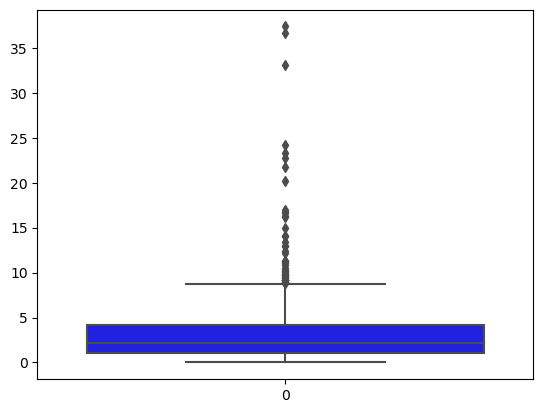

In [82]:
# boxplot ofr the error
sns.boxplot(positive_error, color = 'blue')
plt.savefig('Images/error_boxplot.png', bbox_inches='tight')

In general, the linear regression that was used here had most of it's measures with less than 10% difference from the original values.

This can indicate that the code was able to estimate the evaporation of the region with a good accuracy.

It would be necessary to have a deeper search within pappers to see if the calculated error was acceptable for academic and research purposes, but for this project it is a good measure.

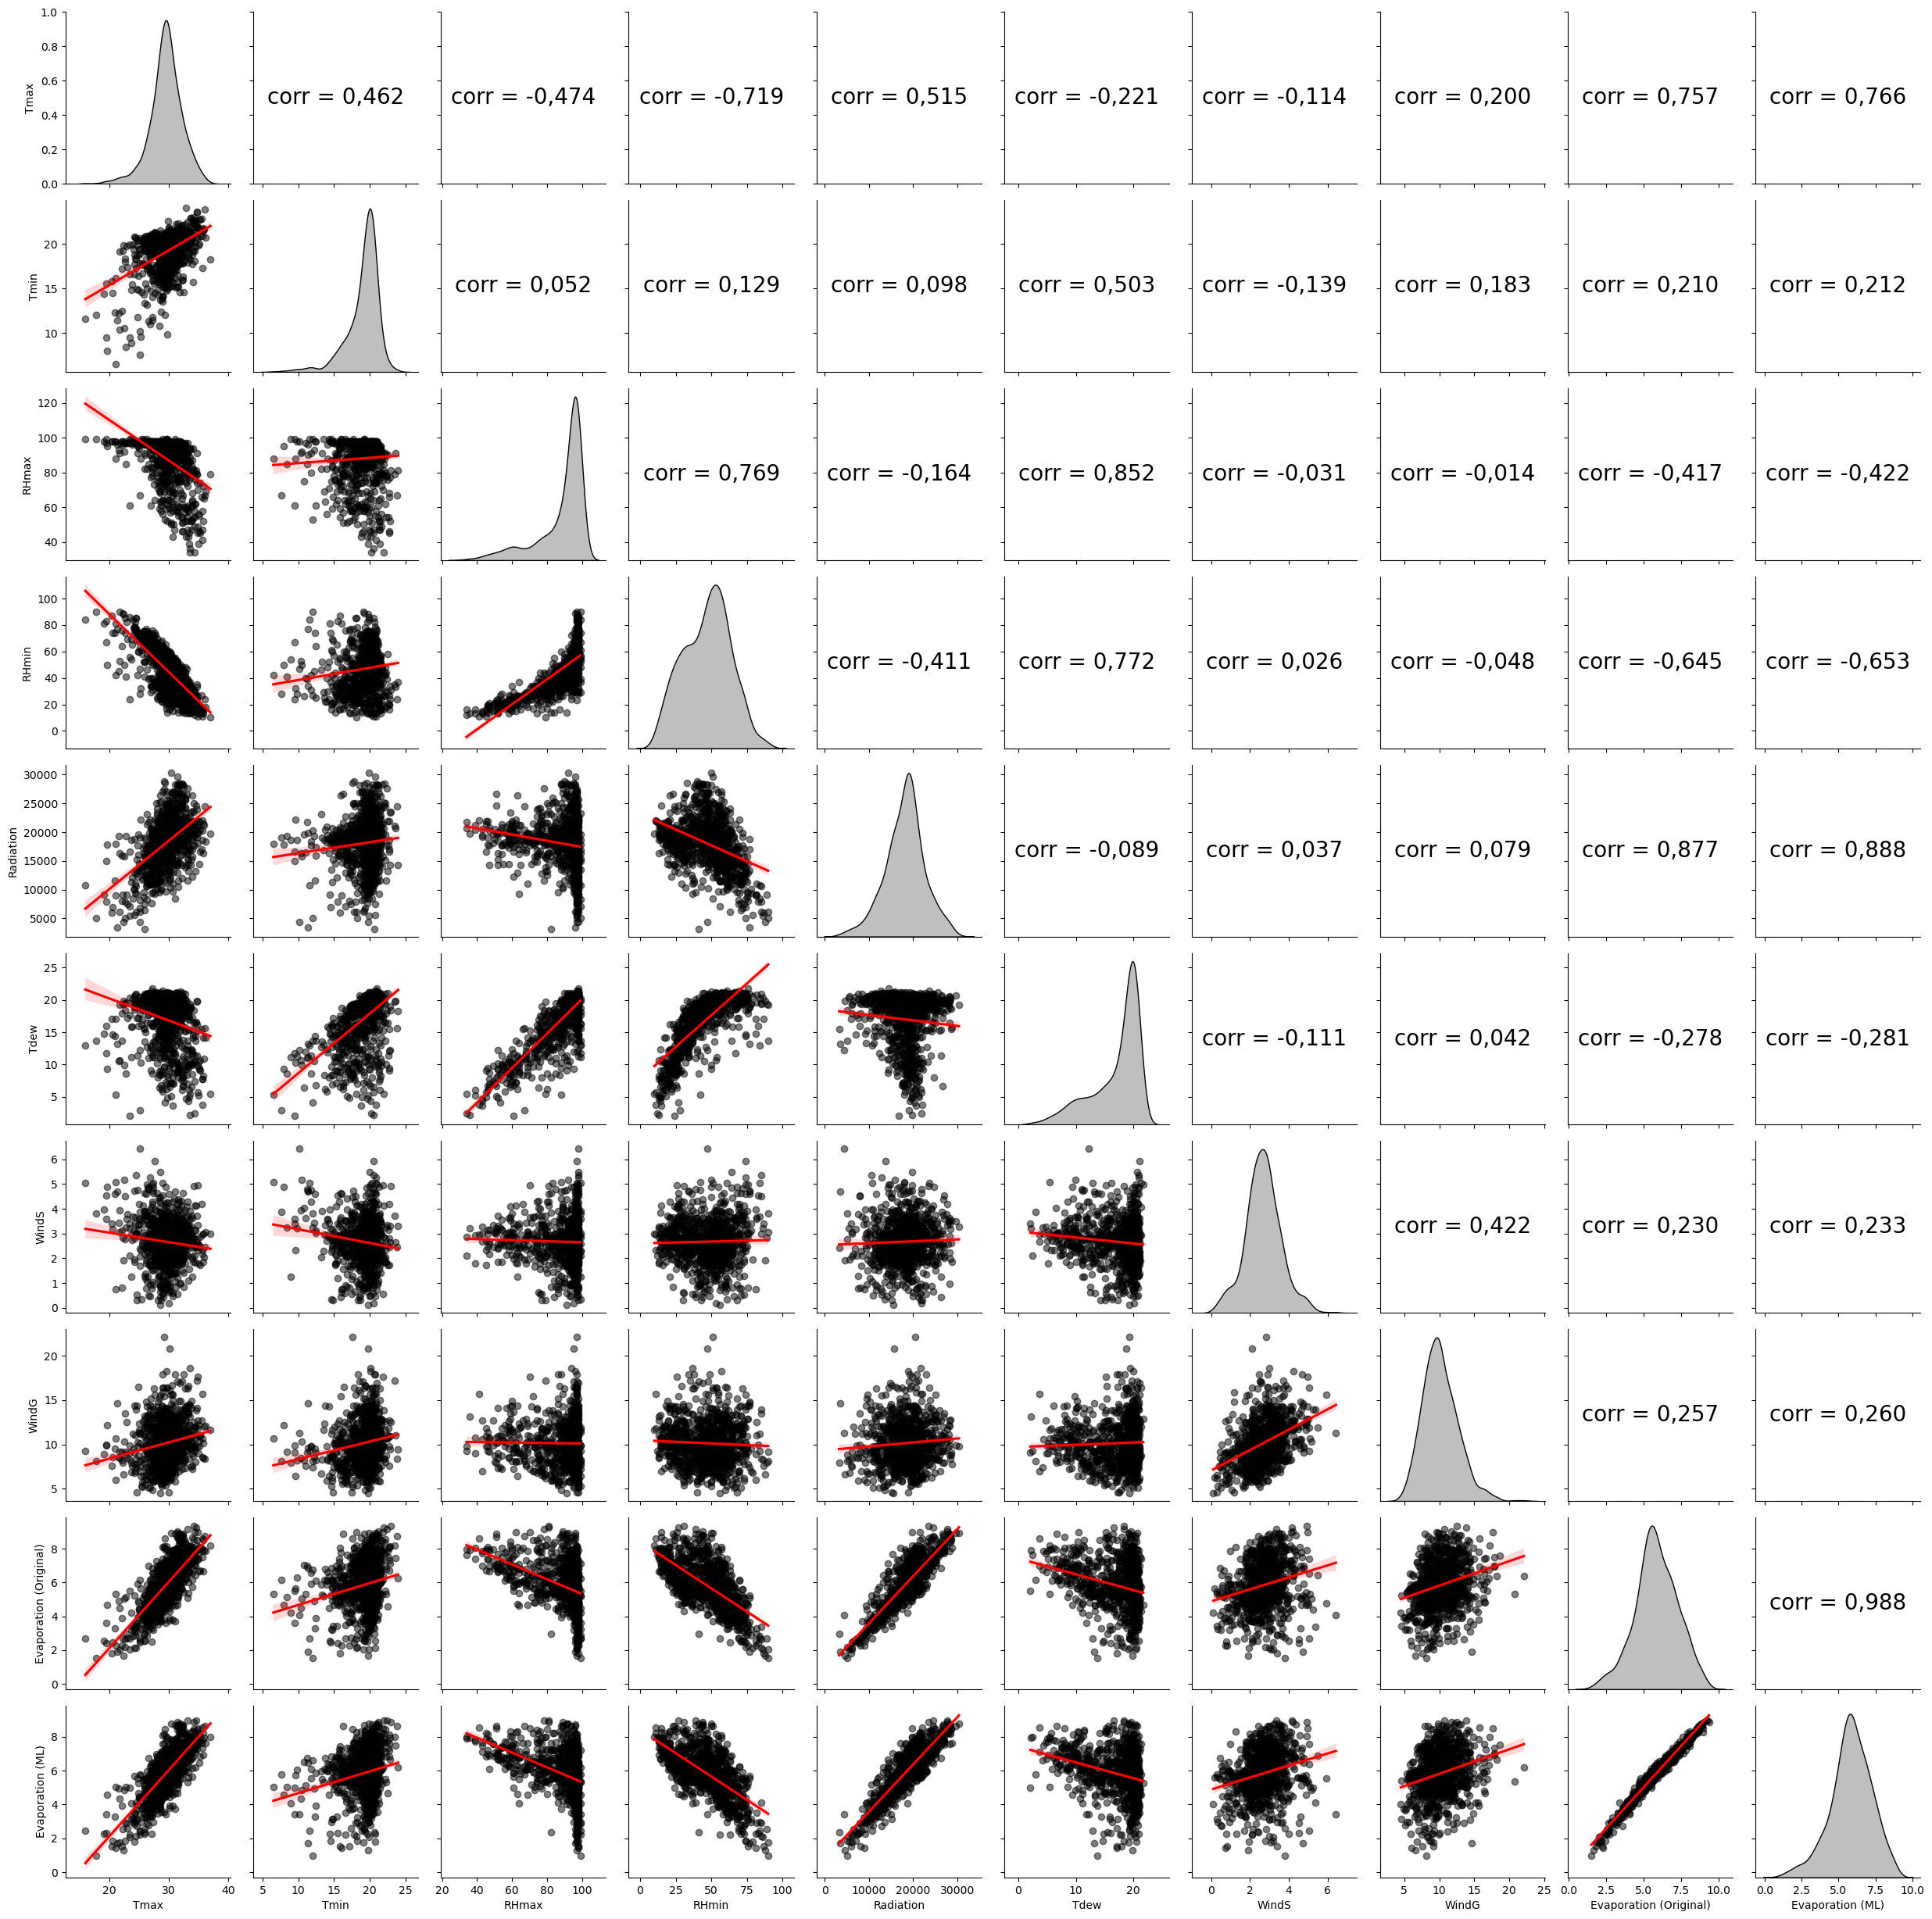

In [68]:
# Define parameter names
parameters = ['Tmax', 'Tmin', 'RHmax', 'RHmin', 'Radiation', 'Tdew', 'WindS', 'WindG', 'Evaporation (Original)', 'Evaporation (ML)']

# Remove duplicate columns from the DataFrame
df = pd.DataFrame(test, columns=parameters)
df = df.loc[:, ~df.columns.duplicated()]

# Set the color palette
colors = ['#000000']  # Set black color for upper triangle
sns.set_palette(sns.color_palette(colors))

# Create a PairGrid
g = sns.PairGrid(df, diag_sharey = False)

# Use a custom function to display centered correlation values in the top right plots
def corrfunc(x, y, **kwargs):
    valid_mask = pd.notnull(x) & pd.notnull(y)
    if valid_mask.sum() < 2:  # Less than 2 valid data points
        return
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    corr = np.corrcoef(x_valid, y_valid)[0, 1]
    ax = plt.gca()
    ax.annotate(f"corr = {corr:.3f}".replace(".", ","), xy=(.5, .5), xycoords=ax.transAxes, ha='center', va='center', fontsize=20)

# Map the custom function to the upper triangle
g.map_upper(corrfunc)

# Scatter plots
g.map_lower(sns.regplot, color='black', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})

# Plot kernel density estimation for each parameter on the diagonal
g.map_diag(sns.kdeplot, color='black', fill=True, lw=1)
     
label_size = 10
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=label_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=label_size)
    ax.tick_params(axis='x', labelsize=10)  # Increase x-axis tick size
    ax.tick_params(axis='y', labelsize=10)  # Increase y-axis tick size

plt.savefig('Images/super_matrix_mod.png', bbox_inches='tight')
# Show the plot
plt.show()

This is the same plot presented before, but now with the calculated evaporation through the Machine Leaning model.

We can see that the correlation between the calculated evaporation and the original one is extremely high but it is not 1, indicating the errors that were shown before.

Using the original Evaporation we can compare all of its coeffiecnts with the calculated evaporation coefficients, showing that our code have a good result be cause both coefficients are almost equal to one another.

In [83]:
# including a excel file with the results
test.to_excel('results.xlsx')